<a href="https://colab.research.google.com/github/EmanSalah2000/classification_FromScratch/blob/main/classification_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# !pip install -q streamlit
!pip install  streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


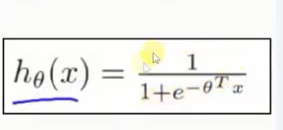

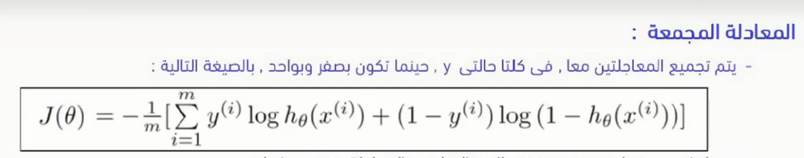

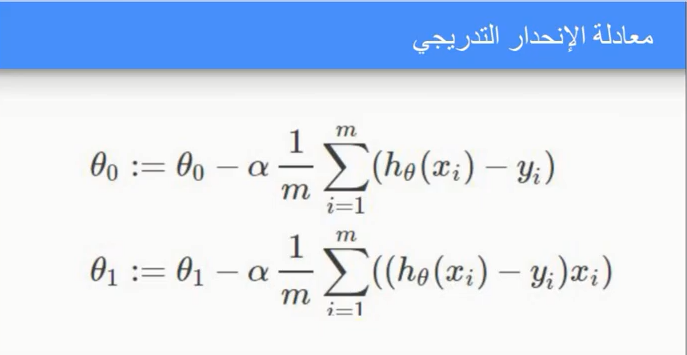

# **code without streamlit**

In [2]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import scipy.optimize as opt

# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))

# def cost(theta, X, y):
#     theta = np.matrix(theta)
#     X = np.matrix(X)
#     y = np.matrix(y)
#     h=sigmoid(X * theta.T)
#     first = np.multiply(-y, np.log(h))
#     second = np.multiply((1 - y), np.log(1 - h))
#     return np.sum(first - second) / (len(X))


# def gradient(theta, X, y):
#     theta = np.matrix(theta)
#     X = np.matrix(X)
#     y = np.matrix(y)
    
#     parameters = int(theta.ravel().shape[1]) # num =3
#     grad = np.zeros(parameters)
    
#     error = sigmoid(X * theta.T) - y # h(x)-y  100,1
    
#     for i in range(parameters):
#         term = np.multiply(error, X[:,i])
#         grad[i] = np.sum(term) / len(X)
    
#     return grad

    
# def predict(theta, X):
#     probability = sigmoid(X * theta.T)
#     return [1 if x >= 0.5 else 0 for x in probability]

# def run_code():
#   path = '/content/classification_example.txt'
#   data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
#   temp_data=data
#   # add a ones column - this makes the matrix multiplication work out easier
#   data.insert(0, 'Ones', 1) # where    name   value

#   # set X (training data) and y (target variable)
#   cols = data.shape[1] # 100 * 4     then cols = 4
#   X = data.iloc[:,0:cols-1]
#   y = data.iloc[:,cols-1:cols]

#   # convert to numpy arrays and initalize the parameter array theta
#   X = np.array(X.values)
#   y = np.array(y.values)
#   theta = np.zeros(3)   # 2 var then 3 theta
#   return temp_data , X,y,theta

# def posive_negative_draw(data):
#     # show data after classifiy it 
#     positive = data[data['Admitted'].isin([1])]
#     negative = data[data['Admitted'].isin([0])]


#     fig, ax = plt.subplots(figsize=(5,5))
#     ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
#     ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
#     ax.legend()
#     ax.set_xlabel('Exam 1 Score')
#     ax.set_ylabel('Exam 2 Score')

# def best_theta(X,y,theta):
#   result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y)) # return the best result for thetaes
#   return result

# def accuracy(result ,X,y):
#   theta_min = np.matrix(result[0])
#   predictions = predict(theta_min, X)

#   correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
#   accuracy = (sum(map(int, correct)) % len(correct))
#   print ('accuracy = {0}%'.format(accuracy))
#   # return accuracy


# data , X,y,theta=run_code()
# posive_negative_draw(data)
# result=best_theta(X,y,theta)
# accuracy(result,X,y)



# **code with streamlit**

In [3]:


%%writefile app.py

import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    h=sigmoid(X * theta.T)
    first = np.multiply(-y, np.log(h))
    second = np.multiply((1 - y), np.log(1 - h))
    return np.sum(first - second) / (len(X))


def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1]) # num =3
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y # h(x)-y  100,1
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

    
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

def run_code():
  path = '/content/classification_example.txt'
  data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
  temp_data=data
  # add a ones column - this makes the matrix multiplication work out easier
  data.insert(0, 'Ones', 1) # where    name   value

  # set X (training data) and y (target variable)
  cols = data.shape[1] # 100 * 4     then cols = 4
  X = data.iloc[:,0:cols-1]
  y = data.iloc[:,cols-1:cols]

  # convert to numpy arrays and initalize the parameter array theta
  X = np.array(X.values)
  y = np.array(y.values)
  theta = np.zeros(3)   # 2 var then 3 theta
  return temp_data , X,y,theta

def posive_negative_draw(data):
    # show data after classifiy it 
    positive = data[data['Admitted'].isin([1])]
    negative = data[data['Admitted'].isin([0])]


    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
    ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
    ax.legend()
    ax.set_xlabel('Exam 1 Score')
    ax.set_ylabel('Exam 2 Score')
    st.pyplot(fig)


def best_theta(X,y,theta):
  result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y)) # return the best result for thetaes
  return result

def accuracy(result ,X,y):
  theta_min = np.matrix(result[0])
  predictions = predict(theta_min, X)

  correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
  accuracy = (sum(map(int, correct)) % len(correct))
  # print ('accuracy = {0}%'.format(accuracy))
  st.text('accuracy = {0} %'.format(accuracy))
 
  
  # return accuracy


      
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

st.title("classification_example")
with st.form("classification_example"):#,clear_on_submit=True
      submit = st.form_submit_button("Run")
      if submit :
         data ,X , y , theta = run_code()
         posive_negative_draw(data)
         result=best_theta(X,y,theta)
         accuracy(result,X,y)




Overwriting app.py


In [4]:
!wget -q -O - ipv4.icanhazip.com  #if there is a problem in streamlit 

35.245.235.134


In [5]:
import webbrowser
import platform
print(platform.system())
if platform.system() == 'Windows':
  webbrowser.open('http://streamlit.io ')
else:
  print('error')
# !streamlit hello
!streamlit run app.py & npx localtunnel --port 8501

Linux
error
[###########.......] / extract:yargs-parser: sill extract yargs-parser@^20.2.2


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.235.134:8501

npx: installed 22 in 6.849s
your url is: https://free-trams-rhyme.loca.lt
  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   2.71082898E+02
    1    3  6.318123602631536E-01   7.89087138E-01
    2    5  5.892425221302822E-01   7.39226603E+01
    3    7  4.227824068839701E-01   1.85265786E+01
    4    9  4.072926970186691E-01   1.68671133E+01
    5   11  3.818854914522947E-01   1.07735097E+01
    6   13  3.786234888874194E-01   2.31584930E+01
tnc: stepmx = 1000
    7   16  2.389268293310401E-01   3.00822027E+00
    8   18  2.047203891287692E-01   1.52227675E-01
    9   20  2.046713899074760E-01   6.62495132E-02
   10   22  2.035303163184269E-01   9.30780696E-04
tnc: fscale = 32.7775
   11   24  2.035293522095244E-01   8.07206972E-06
